# 과제2. [평가]Mobile 고객 이탈 분석

* 여러분은 OO 통신화사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 고객 이탈여부(CHURN)에 영향을 주는 요인을 찾아 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [57]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 1.가설수립

* 숫자형 최소 3개이상, 범주형 최소 2개 이상씩, 전체 6개의 변수를 도출, 가설을 수립하시오.

* 가설1 : 대학졸업 여부와 이탈과 관계가 있을까

* 가설2 : 연 수입액과 이탈과 관계가 있을까

* 가설3 : 집 가격과 이탈과 관계가 있을까

* 가설4 : 만족도와 이탈과 관계가 있을까

* 가설5 : 변경계획설문과 이탈과 관계가 있을까

* 가설6 : 핸드폰가격과 이탈과 관계가 있을까

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

In [58]:
mobile.isna().sum()

COLLEGE                         0
INCOME                          0
OVERAGE                         0
LEFTOVER                        0
HOUSE                         215
HANDSET_PRICE                   0
AVERAGE_CALL_DURATION           0
REPORTED_SATISFACTION          38
CONSIDERING_CHANGE_OF_PLAN      0
CHURN                           0
dtype: int64

In [59]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   COLLEGE                     18000 non-null  int64  
 1   INCOME                      18000 non-null  int64  
 2   OVERAGE                     18000 non-null  int64  
 3   LEFTOVER                    18000 non-null  int64  
 4   HOUSE                       17785 non-null  float64
 5   HANDSET_PRICE               18000 non-null  int64  
 6   AVERAGE_CALL_DURATION       18000 non-null  int64  
 7   REPORTED_SATISFACTION       17962 non-null  object 
 8   CONSIDERING_CHANGE_OF_PLAN  18000 non-null  object 
 9   CHURN                       18000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 1.4+ MB


### 1) COLLEGE	

대학졸업여부, 범주, NaN 존재하지 않음, 가변수 대상아님

In [78]:
#기초통계량
print(mobile['COLLEGE'].value_counts())
print('-'*50)
print(mobile['COLLEGE'].value_counts()/len(mobile['COLLEGE']))

1    8925
0    8822
Name: COLLEGE, dtype: int64
--------------------------------------------------
1    0.502902
0    0.497098
Name: COLLEGE, dtype: float64


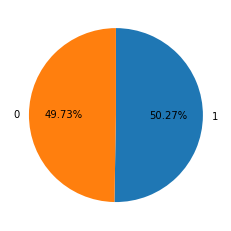

In [61]:
#분포
cnt =  mobile['COLLEGE'].value_counts()
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False)
plt.show()

대학졸업자가 근소하게 앞선다

### 2) INCOME

연 수입액(달러), 숫자, NaN존재하지 않음, 가변수 대상아님

In [62]:
#기초통계량
mobile.INCOME.describe()

count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64

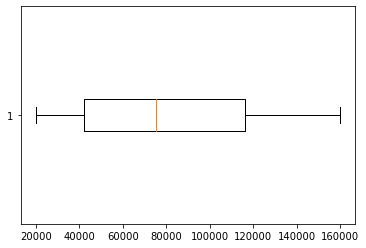

In [63]:
#분포
plt.boxplot(mobile.INCOME, vert= False)
plt.show()

Text(0, 0.5, 'Frequency')

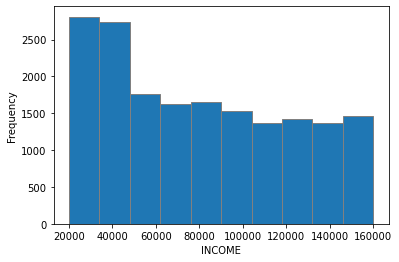

In [115]:
plt.hist(mobile['INCOME'], bins = 10, edgecolor = 'gray')
plt.xlabel('INCOME')
plt.ylabel('Frequency')

연수입액이 20000~40000대에서 높게 있으나 나머지 부분은 비슷하다

### 3) HOUSE

집 가격(달러), 숫자, NaN 존재하므로 해당값 삭제, 가변수대상아님

In [64]:
mobile.dropna(subset=['HOUSE'],axis=0, inplace=True)
mobile.isna().sum()

COLLEGE                        0
INCOME                         0
OVERAGE                        0
LEFTOVER                       0
HOUSE                          0
HANDSET_PRICE                  0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION         38
CONSIDERING_CHANGE_OF_PLAN     0
CHURN                          0
dtype: int64

In [65]:
#기초통계량
mobile.HOUSE.describe()

count     17785.000000
mean     492950.532696
std      252175.173507
min      150015.000000
25%      263876.000000
50%      452277.000000
75%      701460.000000
max      999970.000000
Name: HOUSE, dtype: float64

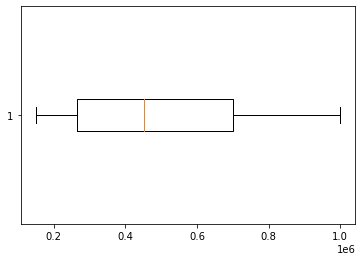

<Figure size 1080x72 with 0 Axes>

In [126]:
#분포
plt.boxplot(mobile['HOUSE'], vert= False)
plt.show()

Text(0, 0.5, 'Frequency')

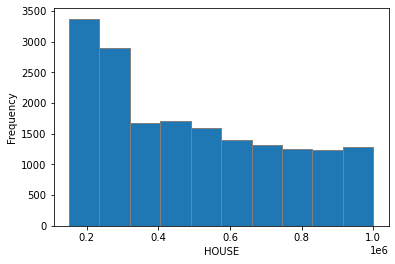

In [130]:
plt.hist(mobile['HOUSE'], bins = 10, edgecolor = 'gray')
plt.xlabel('HOUSE')
plt.ylabel('Frequency')

낮은 가격대에 몰려있고 나머지는 균등하게 분포되어있다

### 4) HANDSET_PRICE

핸드폰 가격(달러), 숫자, NaN존재하지 않음, 가변수 대상아님

In [67]:
#기초통계량
mobile.HANDSET_PRICE.describe()

count    17785.000000
mean       390.157717
std        214.218564
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64

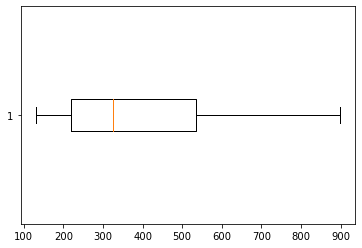

In [68]:
#분포
plt.boxplot(mobile['HANDSET_PRICE'], vert= False)
plt.show()

Text(0, 0.5, 'Frequency')

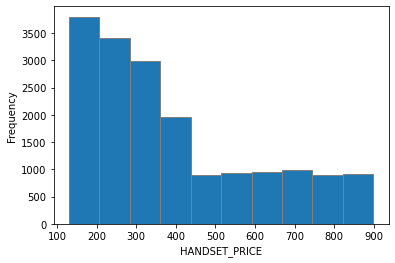

In [123]:
plt.hist(mobile['HANDSET_PRICE'], bins = 10, edgecolor = 'gray')
plt.xlabel('HANDSET_PRICE')
plt.ylabel('Frequency')

500달러 미만대에 몰려있으며 나머지 구간은 균등하게 분포되어있다

### 5) REPORTED_SATISFACTION

In [70]:
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' ), 범주, NaN 존재함, 가변수 대상

In [71]:
mobile['REPORTED_SATISFACTION'] = mobile['REPORTED_SATISFACTION'].map({'very_unsat' : 0, 'unsat' : 1, 'avg' : 2 , 'sat' : 3, 'very_sat' : 4})
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,1.0,considering,0
1,0,74132,191,43,535092.0,349,2,1.0,no,1
2,1,150419,0,14,204004.0,682,6,1.0,considering,0
3,0,159567,0,58,281969.0,634,1,0.0,never_thought,0
4,1,23392,0,0,216707.0,233,15,1.0,no,1


In [73]:
mobile.dropna(subset=['REPORTED_SATISFACTION'],axis=0, inplace=True)
mobile.isna().sum()

COLLEGE                       0
INCOME                        0
OVERAGE                       0
LEFTOVER                      0
HOUSE                         0
HANDSET_PRICE                 0
AVERAGE_CALL_DURATION         0
REPORTED_SATISFACTION         0
CONSIDERING_CHANGE_OF_PLAN    0
CHURN                         0
dtype: int64

In [79]:
##기초통계량
print(mobile['REPORTED_SATISFACTION'].value_counts())
print('-'*50)
print(mobile['REPORTED_SATISFACTION'].value_counts()/len(mobile['REPORTED_SATISFACTION']))

0.0    6997
4.0    4508
1.0    3548
2.0    1774
3.0     920
Name: REPORTED_SATISFACTION, dtype: int64
--------------------------------------------------
0.0    0.394264
4.0    0.254015
1.0    0.199921
2.0    0.099961
3.0    0.051840
Name: REPORTED_SATISFACTION, dtype: float64


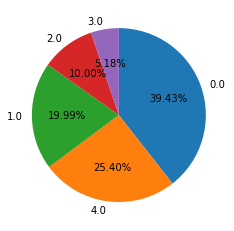

In [76]:
#분포
cnt =  mobile['REPORTED_SATISFACTION'].value_counts()
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False)
plt.show()

4점('very_sat'), 0점('very_unsat')대가 극단적으로 분포해있으며 나머지 구간은 1,2,3순으로 줄어든다

### 6) CONSIDERING_CHANGE_OF_PLAN

변경 계획 설문('never_thought', 'no', 'perhaps', 'considering', 'actively_looking_into_it'), , 범주, NaN 존재안함, 가변수 대상

In [77]:
mobile['CONSIDERING_CHANGE_OF_PLAN'] = mobile['CONSIDERING_CHANGE_OF_PLAN'].map({'never_thought' : 0, 'no' : 1, 'perhaps' : 2 , 'considering' : 3, 'actively_looking_into_it' : 4})
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,1.0,3,0
1,0,74132,191,43,535092.0,349,2,1.0,1,1
2,1,150419,0,14,204004.0,682,6,1.0,3,0
3,0,159567,0,58,281969.0,634,1,0.0,0,0
4,1,23392,0,0,216707.0,233,15,1.0,1,1


In [80]:
#기초통계량
print(mobile['CONSIDERING_CHANGE_OF_PLAN'].value_counts())
print('-'*50)
print(mobile['CONSIDERING_CHANGE_OF_PLAN'].value_counts()/len(mobile['CONSIDERING_CHANGE_OF_PLAN']))

3    7028
4    4391
1    3599
0    1783
2     946
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
--------------------------------------------------
3    0.396011
4    0.247422
1    0.202795
0    0.100468
2    0.053305
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64


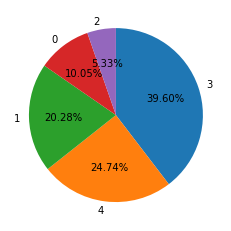

In [81]:
#분포
cnt =  mobile['CONSIDERING_CHANGE_OF_PLAN'].value_counts()
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False)
plt.show()

대체로 3,4('considering', 'actively_looking_into_it')에 분포되어있다.

### 7) CHURN(target)

이탈여부(1 : 이탈, 0 : 잔류) , 범주, NaN 존재안함, 가변수 대상아님

In [83]:
#기초통계량
print(mobile['CHURN'].value_counts())
print('-'*50)
print(mobile['CHURN'].value_counts()/len(mobile['CHURN']))

0    8996
1    8751
Name: CHURN, dtype: int64
--------------------------------------------------
0    0.506903
1    0.493097
Name: CHURN, dtype: float64


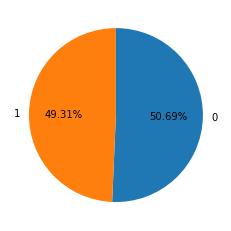

In [84]:
#분포
cnt =  mobile['CHURN'].value_counts()
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', 
        startangle=90, counterclock=False)
plt.show()

잔류가 근소한 차이로 앞선다.

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [ ]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) COLLEGE --> CHURN

In [86]:
pd.crosstab(mobile['COLLEGE'], mobile['CHURN'], normalize = 'index')

CHURN,0,1
COLLEGE,,
0,0.515303,0.484697
1,0.498599,0.501401


CHURN           0         1
COLLEGE                    
0        0.515303  0.484697
1        0.498599  0.501401


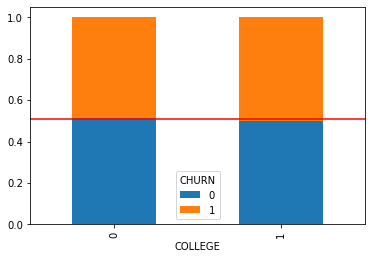

In [87]:
temp = pd.crosstab(mobile['COLLEGE'], mobile['CHURN'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile['CHURN'].mean(), color = 'r')
plt.show()

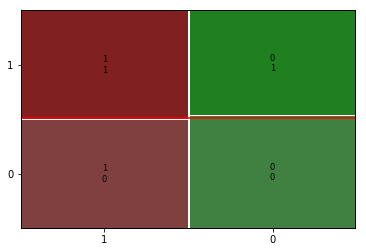

In [88]:
mosaic(mobile, ['COLLEGE', 'CHURN'])
plt.axhline(1- mobile['CHURN'].mean(), color = 'r')
plt.show()

In [89]:
table = pd.crosstab(mobile['COLLEGE'], mobile['CHURN'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 CHURN       0     1
COLLEGE            
0        4546  4276
1        4450  4475
----------------------------------------------------------------------------------------------------
카이제곱통계량 4.885542193051425
p-value 0.027082527124741997
자유도 1
기대빈도
 [[4471.89451738 4350.10548262]
 [4524.10548262 4400.89451738]]


영향을 느낄수 없다

#### 2) REPORTED_SATISFACTION --> CHURN

In [90]:
pd.crosstab(mobile['REPORTED_SATISFACTION'], mobile['CHURN'], normalize = 'index')

CHURN,0,1
REPORTED_SATISFACTION,,
0.0,0.500929,0.499071
1.0,0.498591,0.501409
2.0,0.527057,0.472943
3.0,0.526087,0.473913
4.0,0.510870,0.489130


CHURN                         0         1
REPORTED_SATISFACTION                    
0.0                    0.500929  0.499071
1.0                    0.498591  0.501409
2.0                    0.527057  0.472943
3.0                    0.526087  0.473913
4.0                    0.510870  0.489130


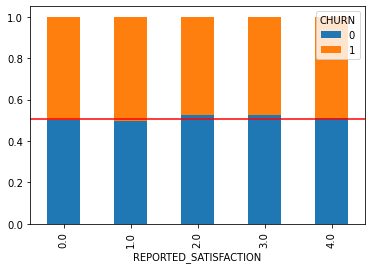

In [91]:
temp = pd.crosstab(mobile['REPORTED_SATISFACTION'], mobile['CHURN'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile['CHURN'].mean(), color = 'r')
plt.show()

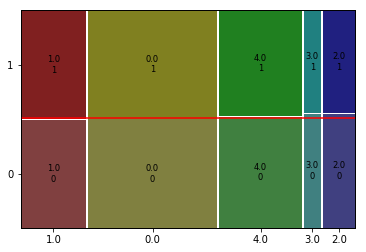

In [92]:
mosaic(mobile, ['REPORTED_SATISFACTION', 'CHURN'])
plt.axhline(1- mobile['CHURN'].mean(), color = 'r')
plt.show()

In [93]:
table = pd.crosstab(mobile['REPORTED_SATISFACTION'], mobile['CHURN'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 CHURN                     0     1
REPORTED_SATISFACTION            
0.0                    3505  3492
1.0                    1769  1779
2.0                     935   839
3.0                     484   436
4.0                    2303  2205
----------------------------------------------------------------------------------------------------
카이제곱통계량 6.501137379112259
p-value 0.16471873330781625
자유도 4
기대빈도
 [[3546.79731786 3450.20268214]
 [1798.49033639 1749.50966361]
 [ 899.2451682   874.7548318 ]
 [ 466.35036908  453.64963092]
 [2285.11680847 2222.88319153]]


영향을 느낄수 없다

#### 3) CONSIDERING_CHANGE_OF_PLAN --> CHURN

In [94]:
pd.crosstab(mobile['CONSIDERING_CHANGE_OF_PLAN'], mobile['CHURN'], normalize = 'index')

CHURN,0,1
CONSIDERING_CHANGE_OF_PLAN,,
0,0.511497,0.488503
1,0.499861,0.500139
2,0.476744,0.523256
3,0.510814,0.489186
4,0.511045,0.488955


CHURN                              0         1
CONSIDERING_CHANGE_OF_PLAN                    
0                           0.511497  0.488503
1                           0.499861  0.500139
2                           0.476744  0.523256
3                           0.510814  0.489186
4                           0.511045  0.488955


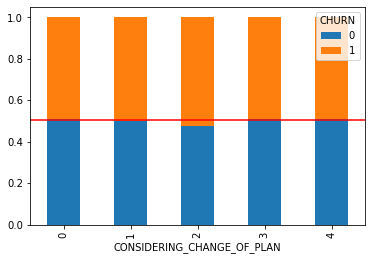

In [95]:
temp = pd.crosstab(mobile['CONSIDERING_CHANGE_OF_PLAN'], mobile['CHURN'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-mobile['CHURN'].mean(), color = 'r')
plt.show()

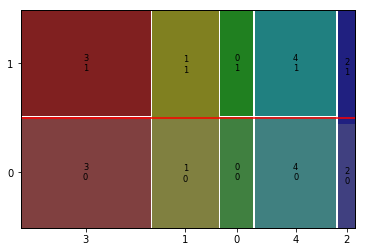

In [96]:
mosaic(mobile, ['CONSIDERING_CHANGE_OF_PLAN', 'CHURN'])
plt.axhline(1- mobile['CHURN'].mean(), color = 'r')
plt.show()

In [97]:
table = pd.crosstab(mobile['CONSIDERING_CHANGE_OF_PLAN'], mobile['CHURN'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

교차표
 CHURN                          0     1
CONSIDERING_CHANGE_OF_PLAN            
0                            912   871
1                           1799  1800
2                            451   495
3                           3590  3438
4                           2244  2147
----------------------------------------------------------------------------------------------------
카이제곱통계량 5.038494801152141
p-value 0.28337044610794754
자유도 4
기대빈도
 [[ 903.80729137  879.19270863]
 [1824.34236772 1774.65763228]
 [ 479.52983603  466.47016397]
 [3562.51129768 3465.48870232]
 [2225.80920719 2165.19079281]]


영향을 느낄수 없다

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) INCOME --> CHURN


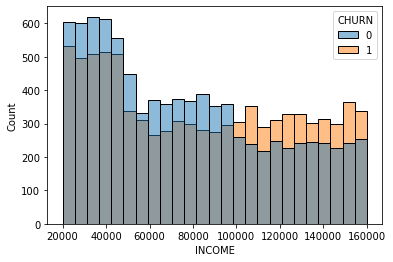

In [100]:
sns.histplot(x='INCOME', data = mobile, hue = 'CHURN')
plt.show()

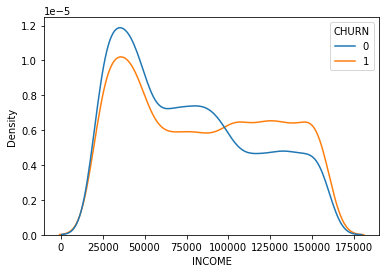

In [101]:
sns.kdeplot(x='INCOME', data = mobile, hue ='Attrition', common_norm = False)
plt.show()

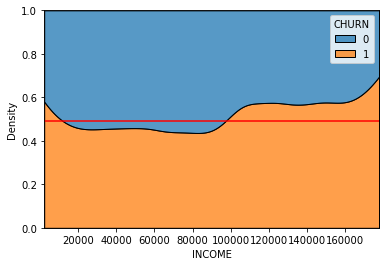

In [103]:
sns.kdeplot(x='INCOME', data = mobile, hue ='CHURN'
            , multiple = 'fill')
plt.axhline(mobile['CHURN'].mean(), color = 'r')
plt.show()

In [131]:
model = sm.Logit(mobile['CHURN'], mobile['INCOME'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692647
         Iterations 2
INCOME    0.000025
dtype: float64


수입이 100000달러 이상이 되면 이탈이 늘어난다. 수입이 많은 사람 입장에서는 현 통신사에 있을 이유가 없는것같다.

#### 2) HOUSE --> CHURN


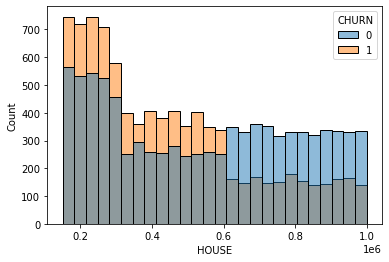

In [107]:
sns.histplot(x='HOUSE', data = mobile, hue = 'CHURN')
plt.show()

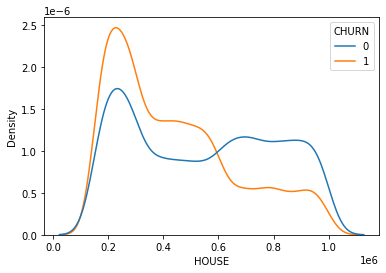

In [105]:
sns.kdeplot(x='HOUSE', data = mobile, hue ='CHURN', common_norm = False)
plt.show()

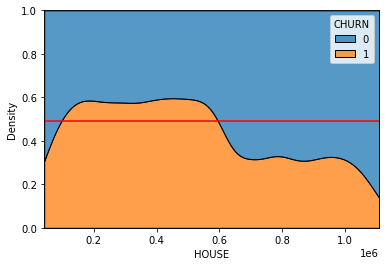

In [108]:
sns.kdeplot(x='HOUSE', data = mobile, hue ='CHURN'
            , multiple = 'fill')
plt.axhline(mobile['CHURN'].mean(), color = 'r')
plt.show()

In [132]:
model = sm.Logit(mobile['CHURN'], mobile['HOUSE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.687256
         Iterations 2
HOUSE    6.686896e-47
dtype: float64


집값이 

#### 3) HANDSET_PRICE --> CHURN


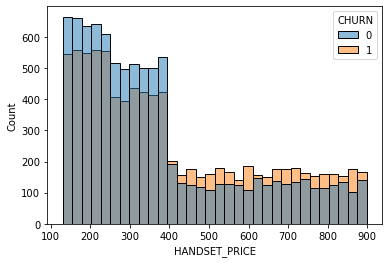

In [110]:
sns.histplot(x='HANDSET_PRICE', data = mobile, hue = 'CHURN')
plt.show()

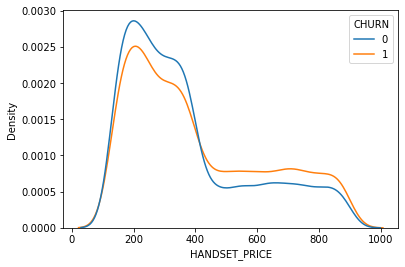

In [111]:
sns.kdeplot(x='HANDSET_PRICE', data = mobile, hue ='CHURN', common_norm = False)
plt.show()

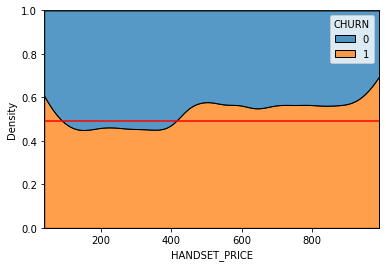

In [112]:
sns.kdeplot(x='HANDSET_PRICE', data = mobile, hue ='CHURN'
            , multiple = 'fill')
plt.axhline(mobile['CHURN'].mean(), color = 'r')
plt.show()

In [133]:
model = sm.Logit(mobile['CHURN'], mobile['HANDSET_PRICE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692695
         Iterations 3
HANDSET_PRICE    0.000063
dtype: float64


500달러 기준으로 이탈이 늘어난다

## 4.관계 정리

### 1) 강한관계의 변수

In [ ]:
INCOME, HOUSE, HANDSET_PRICE

### 2) 약한관계의 변수

### 3) 관계 없음

In [ ]:
COLLEGE, REPORTED_SATISFACTION, CONSIDERING_CHANGE_OF_PLAN 

## 5.추가 분석